In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from synthetic import simulate_var
from models.ckan import cKAN, train_model_ckan, rearrange_data, create_dataset

In [2]:
lag = 3  # number of lags
T = 1000  # number of time points
num_series = 3  # number of time series

batch_size = 32
epochs = 20
lr = 1e-3
sparsity = 0.8

dim_input = num_series * lag
dim_output = 1

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# Simulate data
X_np, beta, GC = simulate_var(p=num_series, T=T, lag=lag, sparsity=sparsity)
X = torch.tensor(X_np[np.newaxis], dtype=torch.float32, device=device)  # add one new dimension for X

([], [])

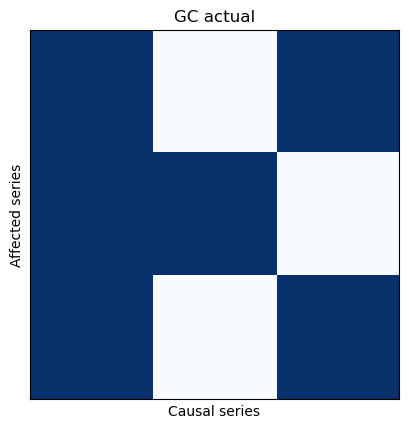

In [4]:
plt.imshow(GC, cmap='Blues')
plt.title('GC actual')
plt.ylabel('Affected series')
plt.xlabel('Causal series')
plt.xticks([])
plt.yticks([])

In [5]:
print("X_np shape: ", X_np.shape)
print('beta shape: ', beta.shape)
print('GC shape: ', GC.shape)
print('X shape: ', X.shape)

X_np shape:  (1000, 3)
beta shape:  (3, 9)
GC shape:  (3, 3)
X shape:  torch.Size([1, 1000, 3])


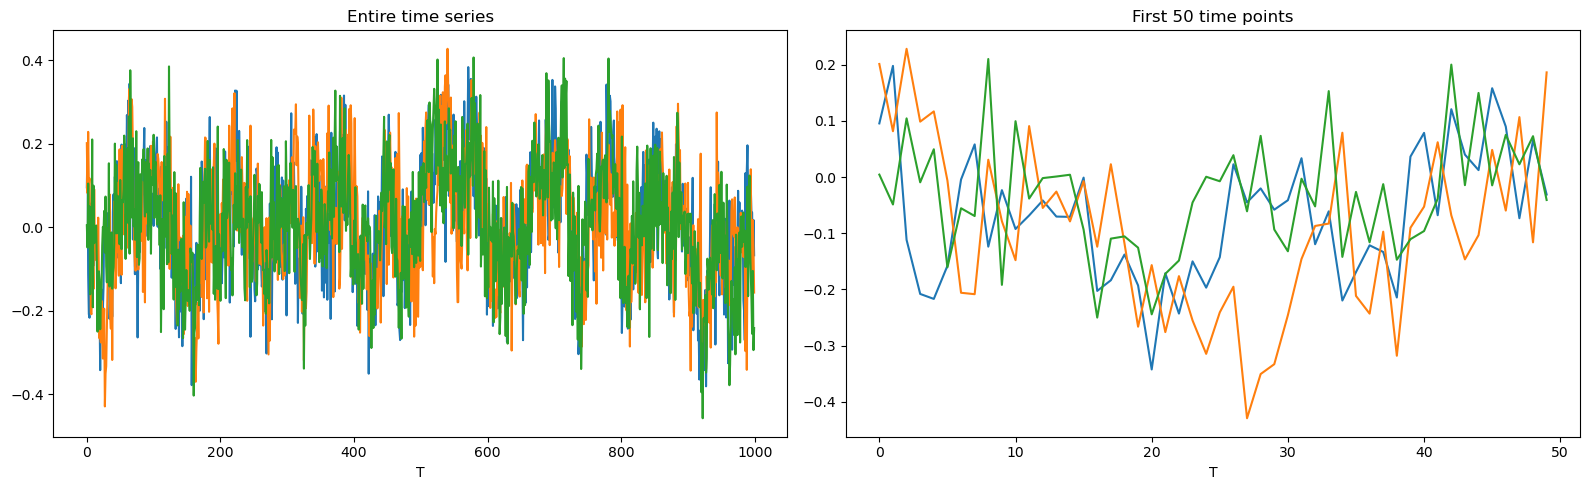

In [6]:
# Plot data
fig, axarr = plt.subplots(1, 2, figsize=(16, 5))
axarr[0].plot(X_np)
axarr[0].set_xlabel('T')
axarr[0].set_title('Entire time series')
axarr[1].plot(X_np[:50])
axarr[1].set_xlabel('T')
axarr[1].set_title('First 50 time points')
plt.tight_layout()
plt.show()

## Create cKAN and Train

### KAN with width=64 for hidden layer

In [7]:
# setup the model
hidden = [num_series*lag, 64, 1]
ckan = cKAN(num_series, lag, hidden, prun_th=0.001)

In [9]:
result = train_model_ckan(ckan, X, max_iter=100)

| train_loss: 1.41e-02 | test_loss: 1.41e-02 | reg: 3.61e+00 | : 100%|█| 100/100 [03:19<00:00,  1.99
| train_loss: 1.22e-02 | test_loss: 1.22e-02 | reg: 3.61e+00 | : 100%|█| 100/100 [03:18<00:00,  1.99
| train_loss: 1.32e-02 | test_loss: 1.32e-02 | reg: 3.71e+00 | : 100%|█| 100/100 [03:03<00:00,  1.84


Text(0.5, 1.0, 'Loss function')

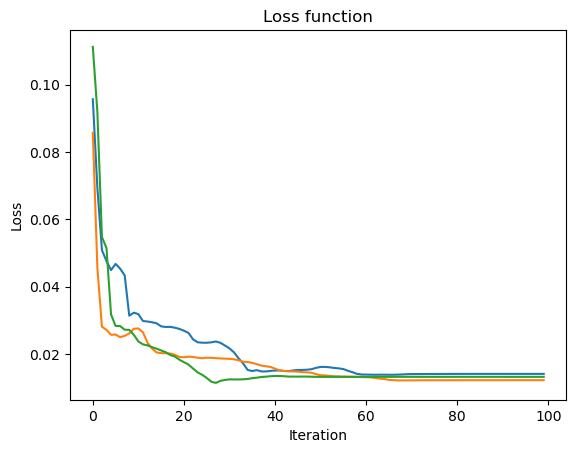

In [11]:
# loss = np.array(temp).T
# plot loss
plt.plot(result)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss function')

[[1.0245022  0.05320224 0.0874026 ]
 [0.05477626 1.0239179  0.04571748]
 [0.05384    0.05568719 1.0249224 ]]


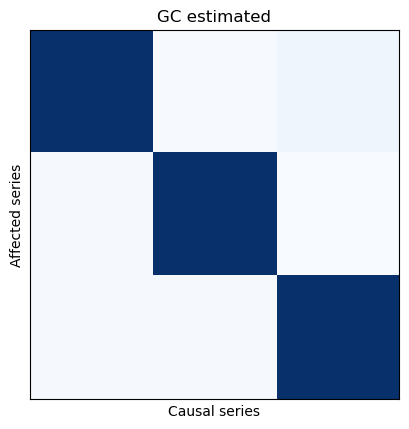

In [12]:
scores = ckan.get_scores()
print(scores)

# plot the heatmap of the GC matrix
plt.figure()
plt.imshow(scores, cmap='Blues')
plt.title('GC estimated')
plt.ylabel('Affected series')
plt.xlabel('Causal series')
plt.xticks([])
plt.yticks([])
plt.show()

In [13]:
GC

array([[1, 0, 1],
       [1, 1, 0],
       [1, 0, 1]])

### KAN with width=32

In [14]:
medium_hidden = [num_series*lag, 32, 1]
ckan_medium = cKAN(num_series, lag, medium_hidden, prun_th=0.001)
result_medium = train_model_ckan(ckan_medium, X, max_iter=100)

| train_loss: 1.87e-02 | test_loss: 1.87e-02 | reg: 3.89e+00 | : 100%|█| 100/100 [01:06<00:00,  1.50
| train_loss: 1.53e-02 | test_loss: 1.53e-02 | reg: 4.30e+00 | : 100%|█| 100/100 [00:49<00:00,  2.03
| train_loss: 1.39e-02 | test_loss: 1.39e-02 | reg: 3.59e+00 | : 100%|█| 100/100 [00:58<00:00,  1.70


Text(0.5, 1.0, 'Loss function')

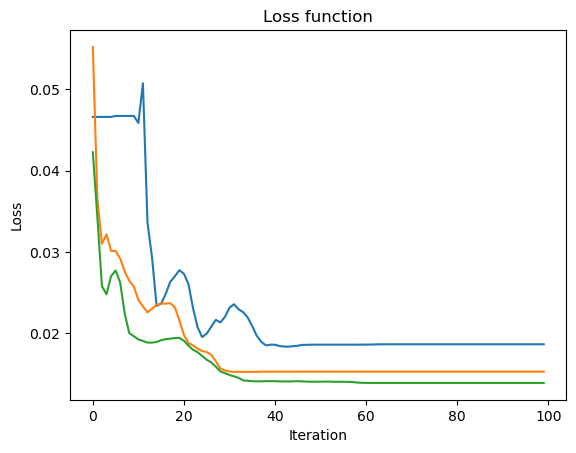

In [16]:
# plot loss
plt.plot(result)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss function')

[[1.0603352  0.04630371 0.14288318]
 [0.12299726 1.0463319  0.07895783]
 [0.03355031 0.0481568  1.042793  ]]


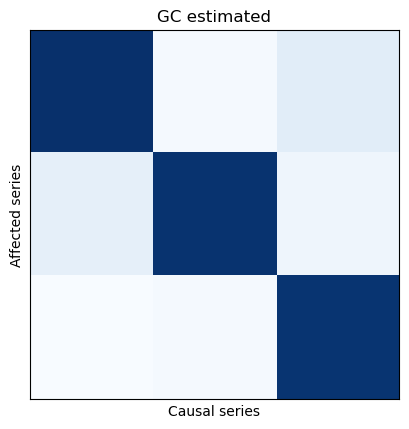

In [17]:
scores_medium = ckan_medium.get_scores()
print(scores_medium)

# plot the heatmap of the GC matrix
plt.figure()
plt.imshow(scores_medium, cmap='Blues')
plt.title('GC estimated')
plt.ylabel('Affected series')
plt.xlabel('Causal series')
plt.xticks([])
plt.yticks([])
plt.show()

In [18]:
GC

array([[1, 0, 1],
       [1, 1, 0],
       [1, 0, 1]])